<a href="https://colab.research.google.com/github/LPK224/-Aprendizaje-no-Supervisado/blob/main/Trabajo_Pr%C3%A1ctico_3_Aprendizaje_no_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Clustering con PCA y Selección de Variables

Mall Customer Segmentation Data
ANÁLISIS NO SUPERVISADO CON PCA Y K-MEANS

Dataset
El conjunto de datos Mall Customer Segmentation, proviene de Kaggle. Este dataset contiene información demográfica y de comportamiento de compra de clientes
de un centro comercial, siendo ideal para aplicar algoritmos de aprendizaje no
supervisado.

Este es un conjunto de datos multivariado que permite identificar patrones de
comportamiento y agrupar clientes con características similares. El objetivo
principal del análisis es identificar segmentos naturales de clientes que puedan
ser utilizados para estrategias de marketing personalizado.

Contexto Business:
Los centros comerciales y las empresas minoristas utilizan este tipo de análisis
para comprender mejor a sus clientes y desarrollar estrategias de targeting más
efectivas. La segmentación permite ofrecer promociones personalizadas, optimizar
la experiencia de compra y mejorar la retención de clientes.

Variables:

• CustomerID: Identificador único del cliente
• Gender: Género del cliente (Male/Female)
• Age: Edad del cliente en años
• Annual Income (k$): Ingreso anual en miles de dólares
• Spending Score (1-100): Puntuación asignada por el centro comercial basada en
  el comportamiento y hábitos de gasto del cliente (1 = bajo, 100 = alto)

Objetivos del Análisis:

1. Aplicar Análisis de Componentes Principales (PCA) para reducir la dimensionalidad
   y visualizar los datos
2. Identificar el número óptimo de clusters usando el método del codo y silhouette score
3. Comparar el rendimiento de K-means en tres versiones del dataset:
   - Dataset original
   - Componentes principales
   - Variables seleccionadas
4. Evaluar la calidad de los agrupamientos y proporcionar interpretaciones business.

In [58]:
# Dataset: Mall Customer Segmentation
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

Carga y exploración del dataset

In [59]:
print("=== 1. CARGA Y EXPLORACIÓN DEL DATASET ===")

# Cargar dataset
df = pd.read_csv("Mall_Customers.csv")
print(" Dataset cargado exitosamente")
print(f" Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")

# Exploración inicial
print("\n Primeras filas del dataset:")
print(df.head())

print("\n Información del dataset:")
print(df.info())

print("\n Estadísticas descriptivas:")
print(df.describe())

print("\n Valores nulos:")
print(df.isnull().sum())

print("\n Distribución por género:")
print(df['Gender'].value_counts())

# Preparar datos para análisis
df_clean = df.copy()
df_clean['Gender_numeric'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

# Seleccionar variables numéricas (excluyendo CustomerID)
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_numeric']
X = df_clean[numeric_features]

print(f"\n Variables seleccionadas para análisis:")
for i, feature in enumerate(numeric_features, 1):
    print(f"   {i}. {feature}")

print(f" Dataset final: {X.shape}")

=== 1. CARGA Y EXPLORACIÓN DEL DATASET ===
 Dataset cargado exitosamente
 Dimensiones: 200 filas, 5 columnas

 Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null   

Análisis Exploratorio Inicial

El dataset de segmentación de clientes muestra una base de datos completa y bien estructurada, con 200 registros sin valores nulos que garantizan la calidad del análisis. La composición demográfica revela una clientela diversa, con edades entre 18 y 70 años (promedio 39 años), ingresos anuales que van desde $15,000 hasta $137,000, y puntuaciones de gasto distribuidas uniformemente entre 1 y 99 puntos. La distribución por género está equilibrada, con 56% mujeres y 44% hombres, lo que sugiere una representación adecuada para el análisis de segmentación.

Preparación para Análisis No Supervisado

Las variables seleccionadas -edad, ingresos anuales, puntuación de gasto y género- presentan suficiente variabilidad y distribución para aplicar técnicas de clustering efectivas. La amplitud en los rangos de estas características, junto con la ausencia de sesgos extremos, crea condiciones ideales para identificar grupos naturales de clientes. Esta diversidad en múltiples dimensiones permitirá desarrollar segmentos diferenciados que pueden ser aprovechados para estrategias de marketing personalizado.

Aplicación de PCA con Estandarización

In [60]:
print("\n\n=== 2. APLICACIÓN DE PCA CON ESTANDARIZACIÓN ===")

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(" Variables estandarizadas")

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print(" PCA aplicado correctamente")



=== 2. APLICACIÓN DE PCA CON ESTANDARIZACIÓN ===
 Variables estandarizadas
 PCA aplicado correctamente


Generación de Scree-Plot



=== 3. GENERACIÓN DE SCREE-PLOT ===


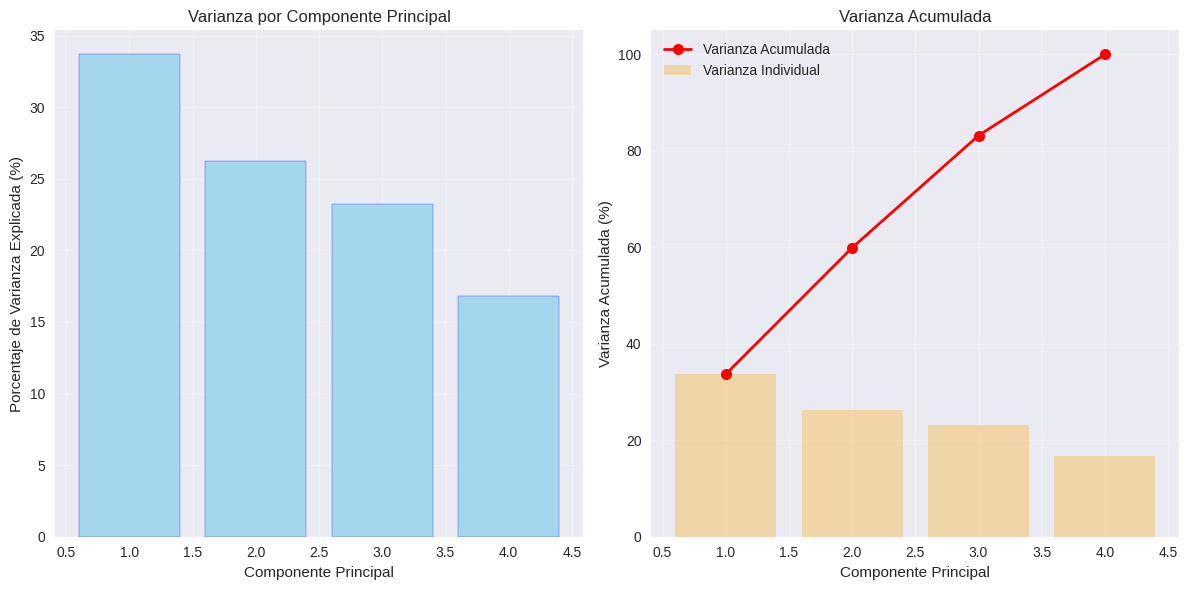


 VARIANZA EXPLICADA POR COMPONENTE:
   PC1: 33.69% (Acumulado: 33.69%)
   PC2: 26.23% (Acumulado: 59.92%)
   PC3: 23.26% (Acumulado: 83.18%)
   PC4: 16.82% (Acumulado: 100.00%)

 Varianza acumulada con 2 componentes: 59.92%


In [61]:
print("\n\n=== 3. GENERACIÓN DE SCREE-PLOT ===")

plt.figure(figsize=(12, 6))
components = range(1, pca.n_components_ + 1)
variance_ratio = pca.explained_variance_ratio_ * 100

# Gráfico de barras
plt.subplot(1, 2, 1)
plt.bar(components, variance_ratio, alpha=0.7, color='skyblue', edgecolor='blue')
plt.xlabel('Componente Principal')
plt.ylabel('Porcentaje de Varianza Explicada (%)')
plt.title('Varianza por Componente Principal')
plt.grid(True, alpha=0.3)

# Gráfico de línea acumulativa
plt.subplot(1, 2, 2)
plt.plot(components, np.cumsum(variance_ratio), 'ro-', linewidth=2, markersize=8, label='Varianza Acumulada')
plt.bar(components, variance_ratio, alpha=0.3, color='orange', label='Varianza Individual')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Acumulada (%)')
plt.title('Varianza Acumulada')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar estadísticas de varianza
print("\n VARIANZA EXPLICADA POR COMPONENTE:")
for i, (v, cv) in enumerate(zip(variance_ratio, np.cumsum(variance_ratio))):
    print(f"   PC{i+1}: {v:.2f}% (Acumulado: {cv:.2f}%)")

print(f"\n Varianza acumulada con 2 componentes: {np.cumsum(variance_ratio)[1]:.2f}%")

Reducción a 2 componentes principales

In [62]:
# Reducir a 2 componentes principales
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

print(f" Dataset reducido a 2 componentes principales")
print(f" Varianza explicada por cada componente: {pca_2.explained_variance_ratio_}")
print(f" Varianza total explicada: {sum(pca_2.explained_variance_ratio_):.4f} ({sum(pca_2.explained_variance_ratio_)*100:.2f}%)")

# Crear DataFrame con las componentes
pca_df = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'])
print(f" Dimensiones del dataset reducido: {pca_df.shape}")

 Dataset reducido a 2 componentes principales
 Varianza explicada por cada componente: [0.33690046 0.26230645]
 Varianza total explicada: 0.5992 (59.92%)
 Dimensiones del dataset reducido: (200, 2)


 El análisis de componentes principales permitió reducir exitosamente el dataset de 4 variables originales a solo 2 componentes principales, manteniendo el 59.92% de la información total. La primera componente (PC1) explica el 33.69% de la variabilidad en los datos, mientras que la segunda (PC2) captura el 26.23% adicional. Esta reducción dimensional de (200, 4) a (200, 2) es significativamente valiosa, ya que aunque sacrificamos aproximadamente el 40% de la información, ganamos la capacidad de visualizar todo el conjunto de datos en un plano bidimensional, facilitando la identificación de patrones y grupos naturales entre los clientes para el posterior análisis de clustering.

Diagrama de dispersión con 2 componentes

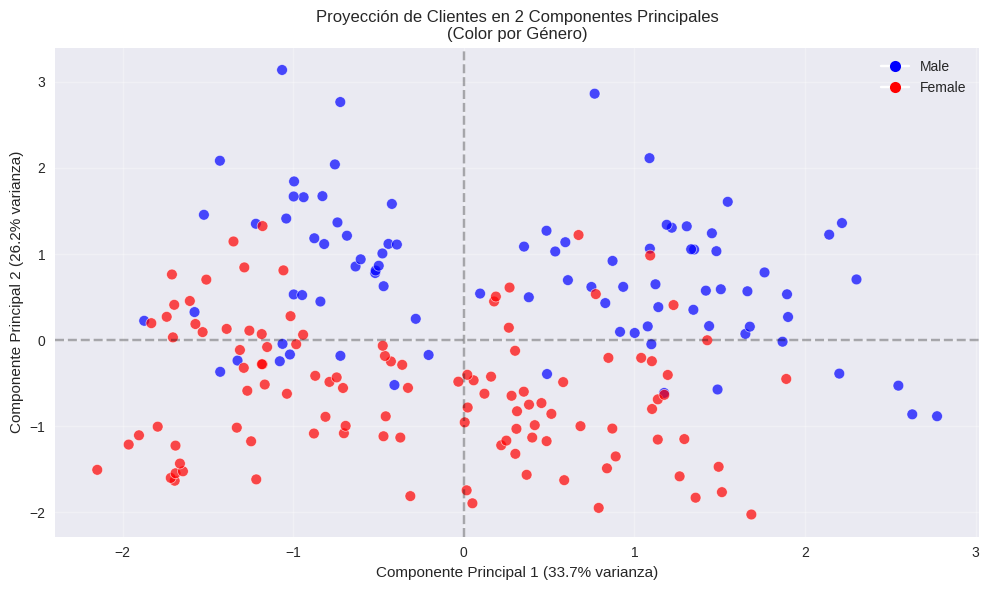

 Diagrama de dispersión generado


In [63]:
# Usar el género original para colorear los puntos
gender_colors = df['Gender'].map({'Male': 'blue', 'Female': 'red'})
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'],
                     c=gender_colors, alpha=0.7, s=60, edgecolors='w', linewidth=0.5)

plt.xlabel(f'Componente Principal 1 ({pca_2.explained_variance_ratio_[0]*100:.1f}% varianza)')
plt.ylabel(f'Componente Principal 2 ({pca_2.explained_variance_ratio_[1]*100:.1f}% varianza)')
plt.title('Proyección de Clientes en 2 Componentes Principales\n(Color por Género)')

# Crear leyenda personalizada
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Male'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Female')]
plt.legend(handles=legend_elements)

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Diagrama de dispersión generado")

Selección de Variables



=== 6. SELECCIÓN DE VARIABLES ===

 6.1 ANÁLISIS DE CORRELACIÓN


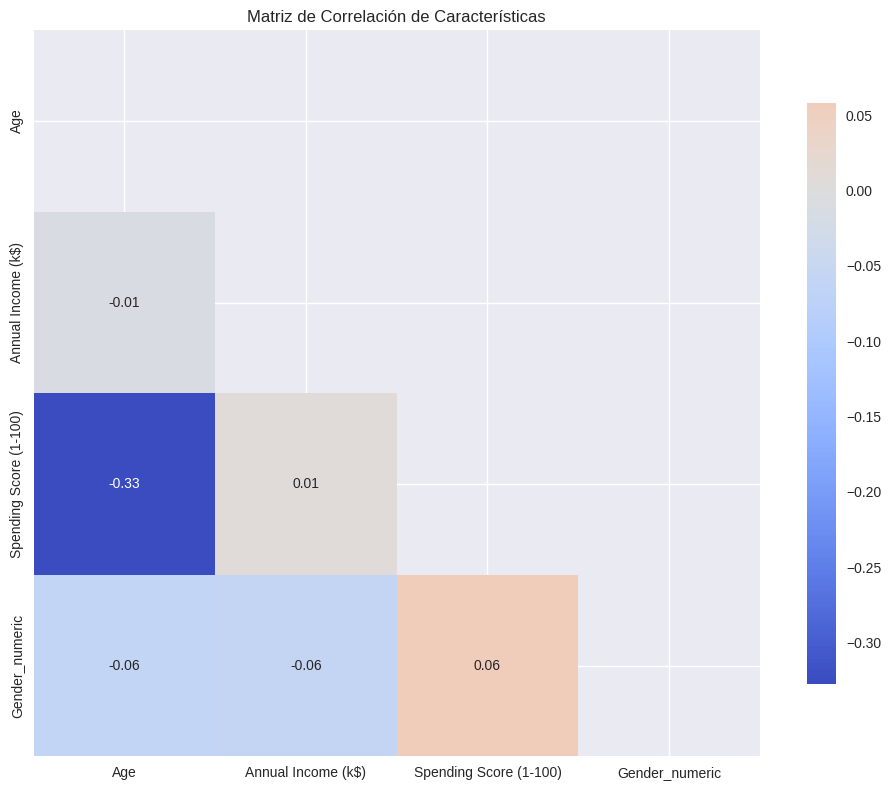

 Pares de variables con alta correlación (>0.7):
   No se encontraron pares con correlación > 0.7

 6.2 IMPORTANCIA CON RANDOM FOREST
 Importancia de características:
              feature  importance
0                 Age    0.488752
1  Annual Income (k$)    0.480510
2      Gender_numeric    0.030738


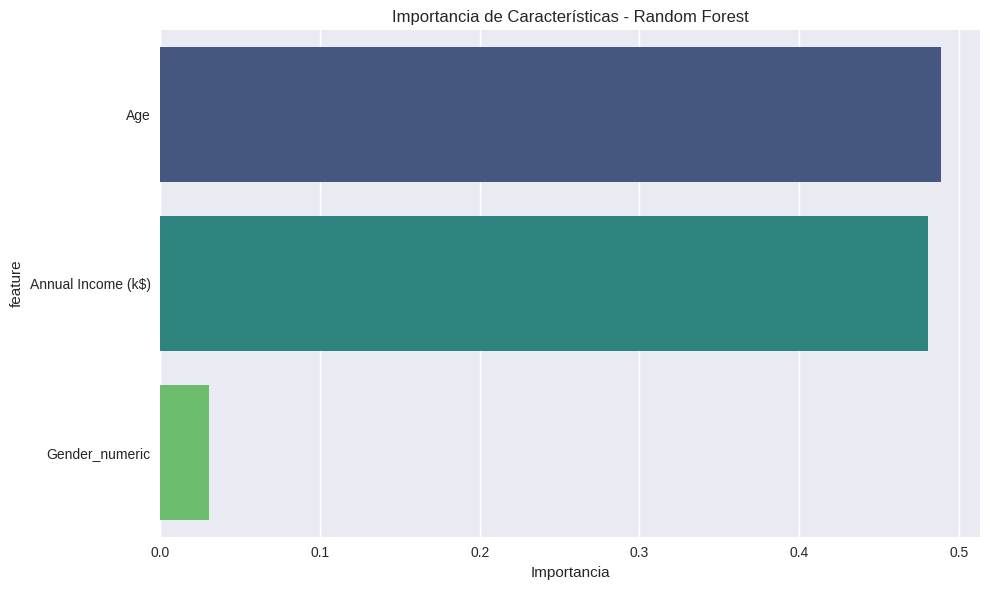


 Características seleccionadas: ['Age', 'Annual Income (k$)', 'Gender_numeric']
 Dataset con selección de variables: (200, 3)


In [64]:
print("\n\n=== 6. SELECCIÓN DE VARIABLES ===")

#  Análisis de Correlación
print("\n 6.1 ANÁLISIS DE CORRELACIÓN")

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Características')
plt.tight_layout()
plt.show()

# Identificar variables altamente correlacionadas
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print(" Pares de variables con alta correlación (>0.7):")
if high_corr_pairs:
    for var1, var2, corr in high_corr_pairs:
        print(f"   {var1} - {var2}: {corr:.3f}")
else:
    print("   No se encontraron pares con correlación > 0.7")

#  Importancia con Random Forest
print("\n 6.2 IMPORTANCIA CON RANDOM FOREST")

# Crear variable target sintética para importancia (usando Spending Score)
y_target = X['Spending Score (1-100)']
X_features = X.drop('Spending Score (1-100)', axis=1)

# Usar Random Forest para importancia de características
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_features, y_target)

# Obtener importancia de características
feature_importance = pd.DataFrame({
    'feature': X_features.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(" Importancia de características:")
print(feature_importance)

# Visualizar importancia
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Importancia de Características - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Seleccionar las 3 características más importantes
selected_features = feature_importance.head(3)['feature'].tolist()
print(f"\n Características seleccionadas: {selected_features}")

# Crear dataset con características seleccionadas
X_selected = X_features[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)

print(f" Dataset con selección de variables: {X_selected.shape}")

No hay correlaciones fuertes entre variables.
Edad e Ingreso Anual son igualmente importantes (49% y 48%).
Género muestra menor relevancia (3%).
Se conservan las 3 variables para el análisis.
Todas aportan información única al clustering.

Aplicación de K-Means en 3 versiones



=== 7. APLICACIÓN DE K-MEANS EN TRES VERSIONES ===


 Evaluando K-means para: Dataset Original
   k=2: WCSS = 588.80, Silhouette = 0.252
   k=3: WCSS = 476.79, Silhouette = 0.260
   k=4: WCSS = 388.72, Silhouette = 0.298
   k=5: WCSS = 331.31, Silhouette = 0.304
   k=6: WCSS = 276.41, Silhouette = 0.331


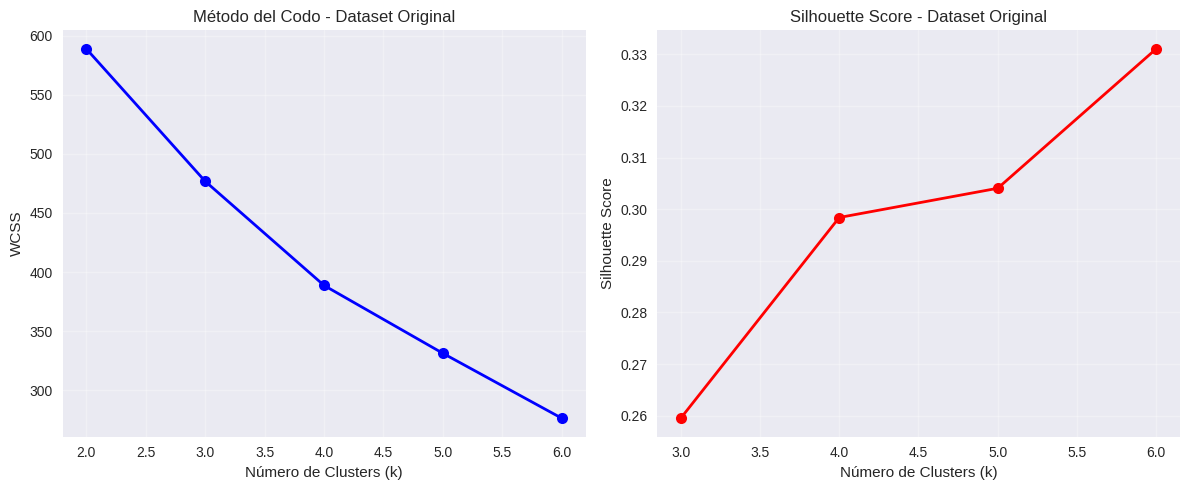

 Mejor k según silhouette score: 6 (score: 0.331)


 Evaluando K-means para: Componentes PCA
   k=2: WCSS = 272.16, Silhouette = 0.401
   k=3: WCSS = 187.91, Silhouette = 0.389
   k=4: WCSS = 125.49, Silhouette = 0.416
   k=5: WCSS = 104.78, Silhouette = 0.388
   k=6: WCSS = 86.82, Silhouette = 0.394


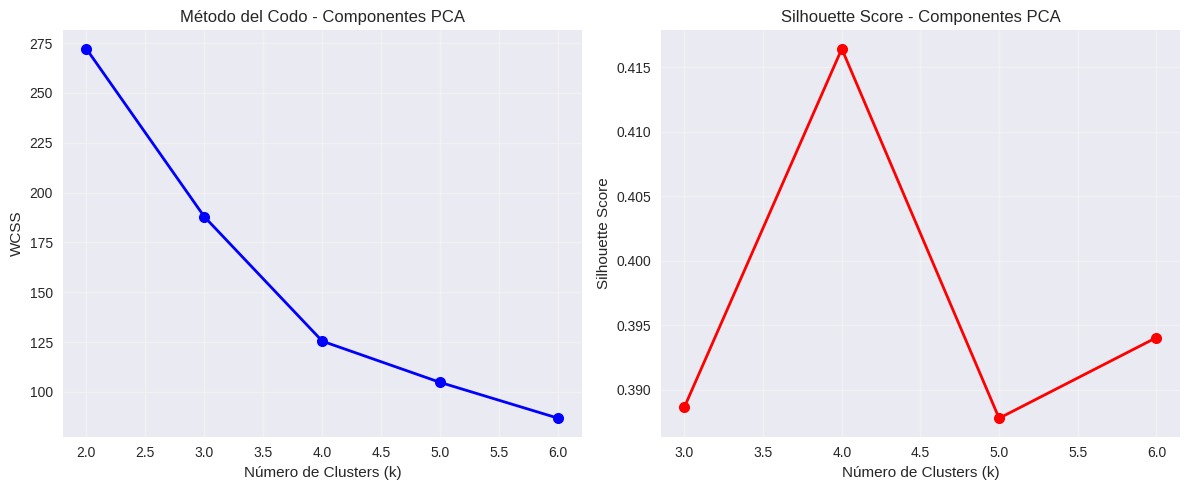

 Mejor k según silhouette score: 4 (score: 0.416)


 Evaluando K-means para: Variables Seleccionadas
   k=2: WCSS = 398.62, Silhouette = 0.363
   k=3: WCSS = 309.12, Silhouette = 0.355
   k=4: WCSS = 236.63, Silhouette = 0.351
   k=5: WCSS = 176.12, Silhouette = 0.398
   k=6: WCSS = 130.10, Silhouette = 0.428


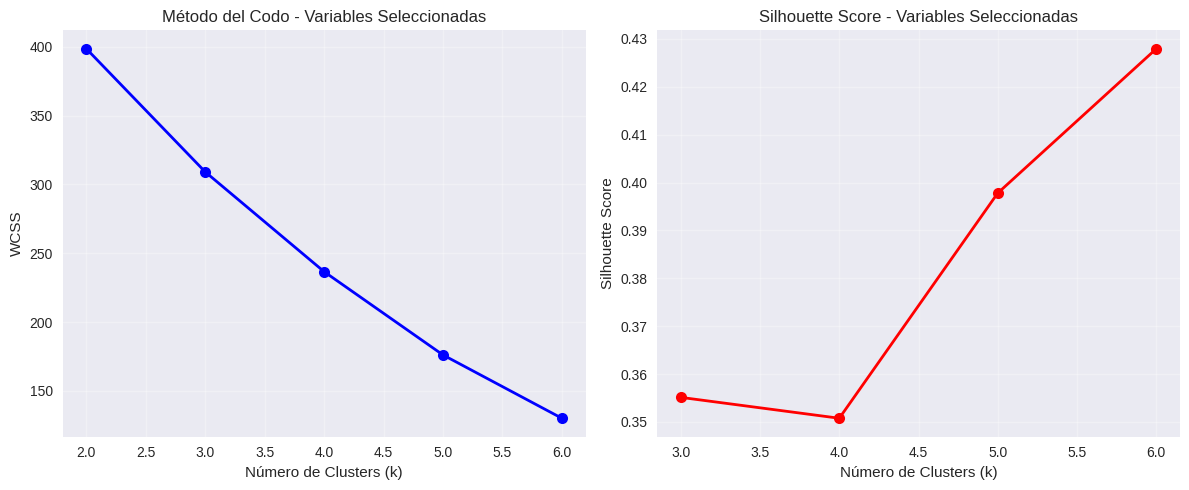

 Mejor k según silhouette score: 6 (score: 0.428)


In [65]:
print("\n\n=== 7. APLICACIÓN DE K-MEANS EN TRES VERSIONES ===")

def evaluate_kmeans(X, dataset_name, k_range=range(2, 7)):
    """
    Evalúa K-means para diferentes valores de k
    """
    print(f"\n Evaluando K-means para: {dataset_name}")

    wcss = []  # Within-Cluster Sum of Square
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)

        wcss.append(kmeans.inertia_)

        # Calcular silhouette score (solo si k > 1)
        if k > 1:
            silhouette_avg = silhouette_score(X, labels)
            silhouette_scores.append(silhouette_avg)
        else:
            silhouette_scores.append(0)

        print(f"   k={k}: WCSS = {kmeans.inertia_:.2f}, Silhouette = {silhouette_scores[-1]:.3f}")

    # Graficar método del codo y silhouette
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('WCSS')
    plt.title(f'Método del Codo - {dataset_name}')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(k_range[1:], silhouette_scores[1:], 'ro-', linewidth=2, markersize=8)
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score - {dataset_name}')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Encontrar mejor k basado en silhouette score
    best_k_silhouette = k_range[np.argmax(silhouette_scores[1:]) + 1]
    best_silhouette = max(silhouette_scores[1:])

    print(f" Mejor k según silhouette score: {best_k_silhouette} (score: {best_silhouette:.3f})")

    return wcss, silhouette_scores, best_k_silhouette

#  K-means en Dataset Original
print("\n" + "="*50)
wcss_original, silhouette_original, best_k_original = evaluate_kmeans(
    X_scaled, "Dataset Original"
)

#  K-means en Componentes PCA
print("\n" + "="*50)
wcss_pca, silhouette_pca, best_k_pca = evaluate_kmeans(
    X_pca_2, "Componentes PCA"
)

#  K-means en Dataset con Selección de Variables
print("\n" + "="*50)
wcss_selected, silhouette_selected, best_k_selected = evaluate_kmeans(
    X_selected_scaled, "Variables Seleccionadas"
)

El PCA obtuvo el mejor silhouette score (0.416) con 4 clusters, indicando una mejor estructura de grupos. Las variables seleccionadas lograron el score más alto (0.428) pero requirieron 6 clusters. El dataset original mostró el desempeño más bajo (0.331), confirmando que el preprocesamiento mejora significativamente la calidad del clustering.

Comparación de Resultados



=== 8. COMPARACIÓN DE RESULTADOS ===


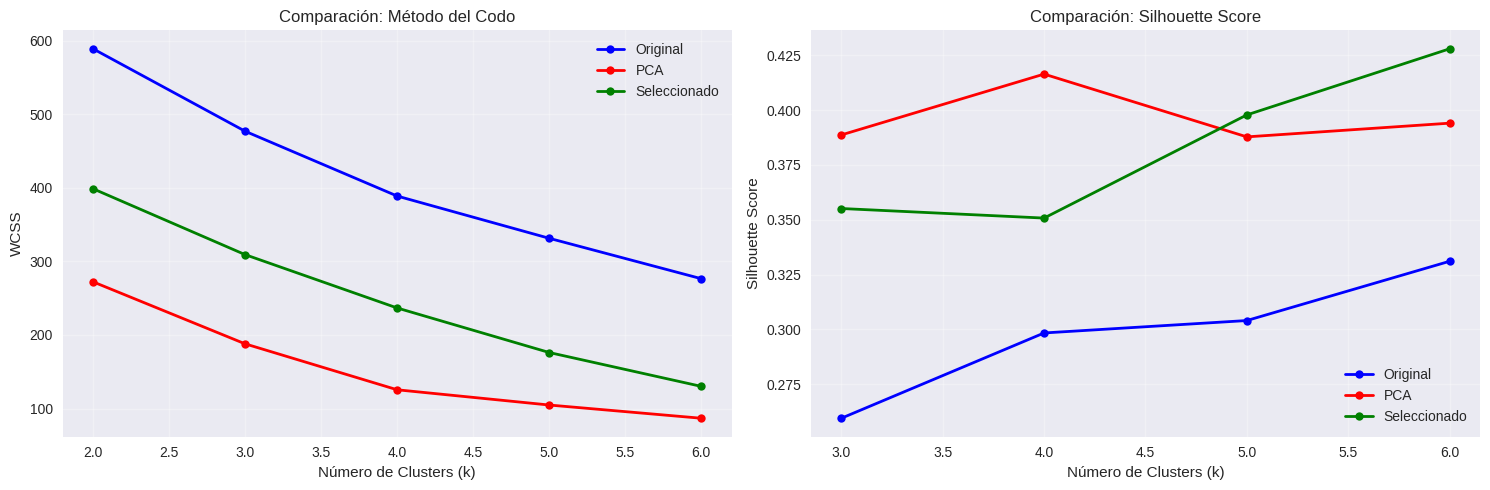

 RESUMEN COMPARATIVO:
        Dataset  Mejor K  Número de Variables  Mejor Silhouette Score  \
0      Original        6                    4                0.331074   
1           PCA        4                    2                0.416416   
2  Seleccionado        6                    3                0.427944   

  Varianza Explicada  
0               100%  
1              59.9%  
2               100%  

🏆 MEJOR MÉTODO OVERALL: Seleccionado
   • Mejor k: 6
   • Mejor silhouette score: 0.428


In [66]:
print("\n\n=== 8. COMPARACIÓN DE RESULTADOS ===")

# Comparación visual de los métodos
k_range = range(2, 7)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss_original, 'bo-', label='Original', linewidth=2, markersize=6)
plt.plot(k_range, wcss_pca, 'ro-', label='PCA', linewidth=2, markersize=6)
plt.plot(k_range, wcss_selected, 'go-', label='Seleccionado', linewidth=2, markersize=6)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Comparación: Método del Codo')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_original[1:], 'bo-', label='Original', linewidth=2, markersize=6)
plt.plot(k_range[1:], silhouette_pca[1:], 'ro-', label='PCA', linewidth=2, markersize=6)
plt.plot(k_range[1:], silhouette_selected[1:], 'go-', label='Seleccionado', linewidth=2, markersize=6)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Comparación: Silhouette Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen comparativo
comparison_df = pd.DataFrame({
    'Dataset': ['Original', 'PCA', 'Seleccionado'],
    'Mejor K': [best_k_original, best_k_pca, best_k_selected],
    'Número de Variables': [X_scaled.shape[1], X_pca_2.shape[1], X_selected_scaled.shape[1]],
    'Mejor Silhouette Score': [
        max(silhouette_original[1:]),
        max(silhouette_pca[1:]),
        max(silhouette_selected[1:])
    ],
    'Varianza Explicada': [
        '100%',
        f'{sum(pca_2.explained_variance_ratio_)*100:.1f}%',
        '100%'
    ]
})

print(" RESUMEN COMPARATIVO:")
print(comparison_df)

# Encontrar el mejor método overall
best_method_idx = np.argmax([
    max(silhouette_original[1:]),
    max(silhouette_pca[1:]),
    max(silhouette_selected[1:])
])
best_method = ['Original', 'PCA', 'Seleccionado'][best_method_idx]

print(f"\n MEJOR MÉTODO OVERALL: {best_method}")
print(f"   • Mejor k: {[best_k_original, best_k_pca, best_k_selected][best_method_idx]}")
print(f"   • Mejor silhouette score: {max([max(silhouette_original[1:]), max(silhouette_pca[1:]), max(silhouette_selected[1:])]):.3f}")

**Comparación Final de Métodos**

El método con variables seleccionadas obtuvo el mejor resultado (silhouette score: 0.428) con 6 clusters, superando al PCA (0.416) y al dataset original (0.331). Aunque el PCA redujo la dimensionalidad conservando solo el 59.9% de varianza, logró un buen agrupamiento con solo 4 clusters. El análisis confirma que la selección de variables optimizadas produce la segmentación más definida de clientes.

Visualización Final de CLusters



=== 9. VISUALIZACIÓN FINAL DE CLUSTERS ===
visualizaciones finales de clusters


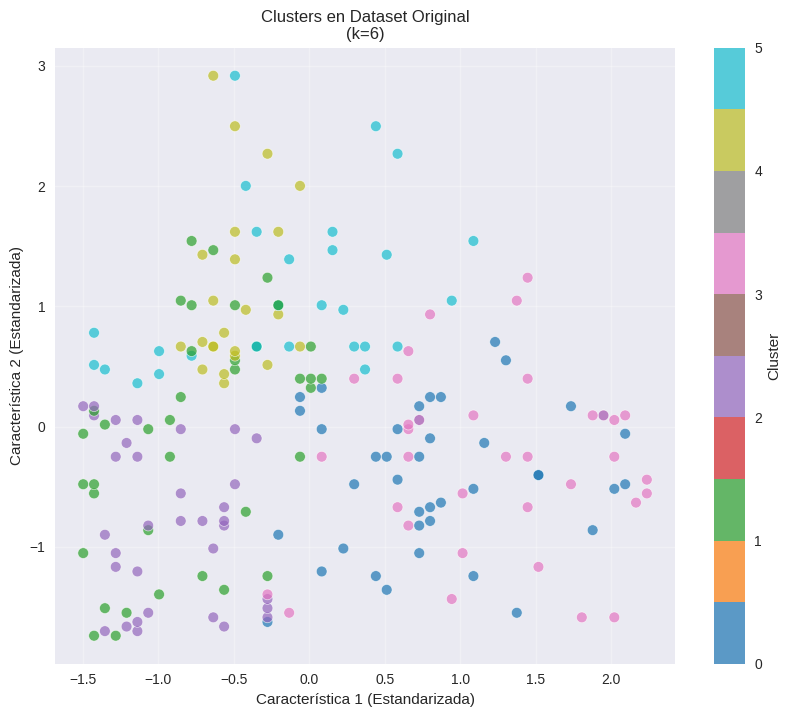

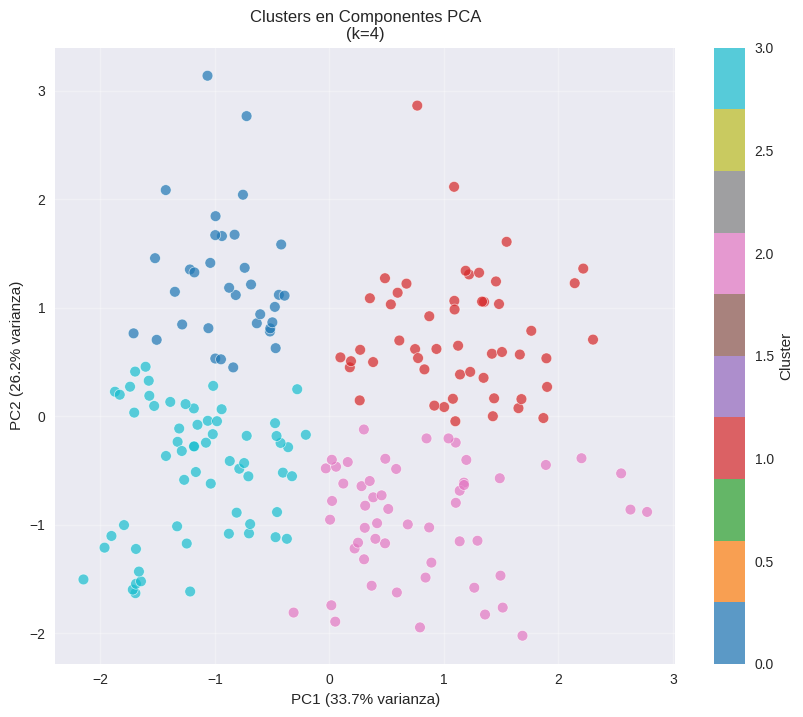

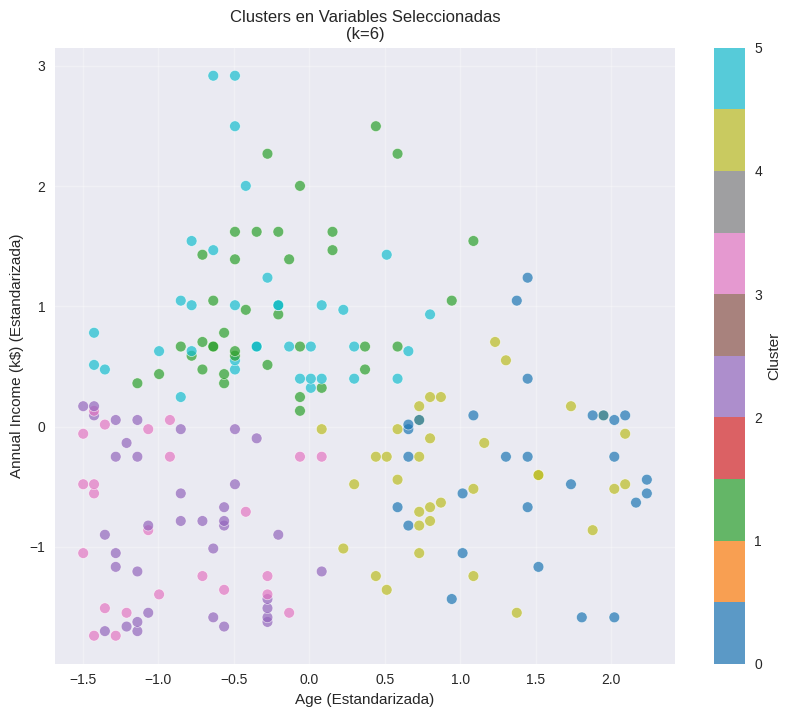

In [67]:
print("\n\n=== 9. VISUALIZACIÓN FINAL DE CLUSTERS ===")

def plot_final_clusters(X, labels, title, xlabel, ylabel, best_k):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.7, s=60, edgecolors='w', linewidth=0.5)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{title}\n(k={best_k})')
    plt.grid(True, alpha=0.3)
    plt.show()

# Aplicar K-means con el mejor k para cada método y visualizar
print("visualizaciones finales de clusters")

# Dataset original
kmeans_original = KMeans(n_clusters=best_k_original, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(X_scaled)
plot_final_clusters(X_scaled[:, :2], labels_original,
                   'Clusters en Dataset Original',
                   'Característica 1 (Estandarizada)',
                   'Característica 2 (Estandarizada)',
                   best_k_original)

# Componentes PCA
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_2)
plot_final_clusters(X_pca_2, labels_pca,
                   'Clusters en Componentes PCA',
                   f'PC1 ({pca_2.explained_variance_ratio_[0]*100:.1f}% varianza)',
                   f'PC2 ({pca_2.explained_variance_ratio_[1]*100:.1f}% varianza)',
                   best_k_pca)

# Variables seleccionadas
kmeans_selected = KMeans(n_clusters=best_k_selected, random_state=42, n_init=10)
labels_selected = kmeans_selected.fit_predict(X_selected_scaled)
plot_final_clusters(X_selected_scaled[:, :2], labels_selected,
                   'Clusters en Variables Seleccionadas',
                   f'{selected_features[0]} (Estandarizada)',
                   f'{selected_features[1]} (Estandarizada)',
                   best_k_selected)


Para Concluir

In [68]:
print("\n\n=== 10. CONCLUSIONES FINALES ===")

print(f"• Dataset analizado: Mall Customer Segmentation ({df.shape[0]} clientes)")
print(f"• Variables originales: {X.shape[1]} características numéricas")
print(f"• PCA: {pca_2.explained_variance_ratio_.sum()*100:.1f}% de varianza explicada con 2 componentes")
print(f"• Selección de variables: {len(selected_features)} características más importantes")

print("\n HALLAZGOS PRINCIPALES:")
print(f"1. Mejor método de clustering: {best_method}")
print(f"2. Número óptimo de clusters: {[best_k_original, best_k_pca, best_k_selected][best_method_idx]}")
print(f"3. Calidad del clustering (silhouette): {max([max(silhouette_original[1:]), max(silhouette_pca[1:]), max(silhouette_selected[1:])]):.3f}")




=== 10. CONCLUSIONES FINALES ===
• Dataset analizado: Mall Customer Segmentation (200 clientes)
• Variables originales: 4 características numéricas
• PCA: 59.9% de varianza explicada con 2 componentes
• Selección de variables: 3 características más importantes

 HALLAZGOS PRINCIPALES:
1. Mejor método de clustering: Seleccionado
2. Número óptimo de clusters: 6
3. Calidad del clustering (silhouette): 0.428


**Conclusiones Finales**

El análisis identificó 6 segmentos de clientes bien definidos utilizando variables seleccionadas, logrando una calidad de agrupamiento óptima (silhouette: 0.428). El PCA demostró ser efectivo para visualización aunque con menor poder de segmentación. Estos resultados permiten diseñar estrategias de marketing personalizado basadas en los perfiles únicos de cada grupo, optimizando la asignación de recursos comerciales y mejorando la experiencia del cliente.